# Upload do CSV

# Ler o CSV no Pandas

In [ ]:
import pandas as pd

csv_path = "bolsistas-iniciacao-cientificia.csv"  # ajuste se usar o Drive

df = pd.read_csv(csv_path, sep=";", encoding="utf-8-sig", low_memory=False)

print(df.shape)
df.head()


(48553, 20)


,id_discente,matricula,discente,titulo,codigo_projeto,id_projeto_pesquisa,ano,id_orientador,orientador,categoria,tipo_de_bolsa,linha_pesquisa,id_grupo_pesquisa,grupo_pesquisa,cota,inicio,fim,id_unidade,unidade,status
0,739553,20170093636,ABDA ROCHA ANDRADE PINHEIRO,Pesquisando práticas musicais no contexto de N...,PVH15882-2018,129546741,2018,5751926,JEAN JOUBERT FREITAS MENDES,Iniciação Científica (IC),VOLUNTÁRIO,Processos sociais e práticas musicais na conte...,135380677.0,GPMuC - Grupo de Pesquisa Música em Múltiplos ...,2019-2020,2019/08/05 00:00:00.000000000,2020/07/31 00:00:00.000000000,284,ESCOLA DE MÚSICA - EMUFRN,PENDENTE DE RELATORIO
1,716941,2016092160,ABDÊNIO VICTOR PEREIRA DA SILVA,Nanopartículas magnéticas para oxidação avança...,PVG13574-2016,117767764,2016,22926,OSVALDO CHIAVONE FILHO,Iniciação Tecnológica (IT),PIBITI UFRN,Fotoquímica e Equilíbrio de Fases,77.0,TECNOLOGIA DE TENSOATIVOS,2020-2021,2020/08/10 00:00:00.000000000,2020/09/03 00:00:00.000000000,57,DEPARTAMENTO DE ENGENHARIA QUIMICA - DEQ/CT,FINALIZADO
2,716941,2016092160,ABDÊNIO VICTOR PEREIRA DA SILVA,Nanopartículas magnéticas para oxidação avança...,PVG13574-2016,117767764,2016,22926,OSVALDO CHIAVONE FILHO,Iniciação Científica (IC),PIBIC AF CNPq,Fotoquímica e Equilíbrio de Fases,77.0,TECNOLOGIA DE TENSOATIVOS,2020-2021,2020/09/03 00:00:00.000000000,2021/08/31 00:00:00.000000000,57,DEPARTAMENTO DE ENGENHARIA QUIMICA - DEQ/CT,FINALIZADO
3,88234,200504593,ABDON SILVA RIBEIRO DA CUNHA,O agronegócio da carcinicultura no RN e a estr...,PVE334-2006,41258,2006,64653,MARIANA BALDI,Iniciação Científica (IC),PROPESQ,Organizações e comportamento organizacional;;;,38.0,BASE DE ESTUDOS E PESQUISAS EM ESTRATÉGIAS E P...,2006-2007,2006/08/01 00:00:00.000000000,2007/07/31 00:00:00.000000000,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS - CCSA,FINALIZADO
4,88234,200504593,ABDON SILVA RIBEIRO DA CUNHA,Motivos de Adesão e Filiação ao Trabalho Volun...,PVE3275-2009,11687003,2009,23198,WASHINGTON JOSE DE SOUSA,Iniciação Científica (IC),PIBIC,Análise e Avaliação de Políticas Públicas;;;,NaN,NaN,2009-2010,2009/08/01 00:00:00.000000000,2009/12/25 00:00:00.000000000,161,DEPARTAMENTO DE CIÊNCIAS ADMINISTRATIVAS - DEP...,FINALIZADO


# Limpeza inicial

In [3]:
# Padronizar nomes das colunas
df.columns = [c.strip().lower() for c in df.columns]

# Tratar strings em colunas de texto
text_cols = ["discente","orientador","titulo","linha_pesquisa","grupo_pesquisa",
             "unidade","categoria","tipo_de_bolsa","cota","status"]

for c in text_cols:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip().replace({"nan": None})

# Converter datas
for c in ["inicio","fim"]:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], dayfirst=True, errors="coerce")

# Converter ano
if "ano" in df.columns:
    df["ano"] = pd.to_numeric(df["ano"], errors="coerce").astype("Int64")

df.head()


/tmp/ipykernel_33424/4045801253.py:15: UserWarning: Parsing dates in %Y/%m/%d %H:%M:%S.%f format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[c] = pd.to_datetime(df[c], dayfirst=True, errors="coerce")


,id_discente,matricula,discente,titulo,codigo_projeto,id_projeto_pesquisa,ano,id_orientador,orientador,categoria,tipo_de_bolsa,linha_pesquisa,id_grupo_pesquisa,grupo_pesquisa,cota,inicio,fim,id_unidade,unidade,status
0,739553,20170093636,ABDA ROCHA ANDRADE PINHEIRO,Pesquisando práticas musicais no contexto de N...,PVH15882-2018,129546741,2018,5751926,JEAN JOUBERT FREITAS MENDES,Iniciação Científica (IC),VOLUNTÁRIO,Processos sociais e práticas musicais na conte...,135380677.0,GPMuC - Grupo de Pesquisa Música em Múltiplos ...,2019-2020,2019-05-08,2020-07-31,284,ESCOLA DE MÚSICA - EMUFRN,PENDENTE DE RELATORIO
1,716941,2016092160,ABDÊNIO VICTOR PEREIRA DA SILVA,Nanopartículas magnéticas para oxidação avança...,PVG13574-2016,117767764,2016,22926,OSVALDO CHIAVONE FILHO,Iniciação Tecnológica (IT),PIBITI UFRN,Fotoquímica e Equilíbrio de Fases,77.0,TECNOLOGIA DE TENSOATIVOS,2020-2021,2020-10-08,2020-09-03,57,DEPARTAMENTO DE ENGENHARIA QUIMICA - DEQ/CT,FINALIZADO
2,716941,2016092160,ABDÊNIO VICTOR PEREIRA DA SILVA,Nanopartículas magnéticas para oxidação avança...,PVG13574-2016,117767764,2016,22926,OSVALDO CHIAVONE FILHO,Iniciação Científica (IC),PIBIC AF CNPq,Fotoquímica e Equilíbrio de Fases,77.0,TECNOLOGIA DE TENSOATIVOS,2020-2021,2020-03-09,2021-08-31,57,DEPARTAMENTO DE ENGENHARIA QUIMICA - DEQ/CT,FINALIZADO
3,88234,200504593,ABDON SILVA RIBEIRO DA CUNHA,O agronegócio da carcinicultura no RN e a estr...,PVE334-2006,41258,2006,64653,MARIANA BALDI,Iniciação Científica (IC),PROPESQ,Organizações e comportamento organizacional;;;,38.0,BASE DE ESTUDOS E PESQUISAS EM ESTRATÉGIAS E P...,2006-2007,2006-01-08,2007-07-31,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS - CCSA,FINALIZADO
4,88234,200504593,ABDON SILVA RIBEIRO DA CUNHA,Motivos de Adesão e Filiação ao Trabalho Volun...,PVE3275-2009,11687003,2009,23198,WASHINGTON JOSE DE SOUSA,Iniciação Científica (IC),PIBIC,Análise e Avaliação de Políticas Públicas;;;,NaN,None,2009-2010,2009-01-08,2009-12-25,161,DEPARTAMENTO DE CIÊNCIAS ADMINISTRATIVAS - DEP...,FINALIZADO


# Normalizar nomes

In [4]:
import unicodedata

def canonical(s):
    """Remove acentos, deixa maiúsculo e tira espaços extras"""
    if pd.isna(s):
        return None
    s = str(s).upper().strip()
    s = "".join(
        ch for ch in unicodedata.normalize("NFD", s)
        if unicodedata.category(ch) != "Mn"
    )
    return s

# Criar colunas normalizadas
for col in ["discente", "orientador", "titulo", "tipo_de_bolsa"]:
    if col in df.columns:
        df[col + "_clean"] = df[col].map(canonical)


# Criar tabelas normalizadas

In [51]:
#Filtra as bolsas que estão em andamento
df_andamento = df[df['status'] == 'EM ANDAMENTO']

discentes = df_andamento[["id_discente","matricula","discente"]].drop_duplicates()
orientadores = df_andamento[["id_orientador","orientador"]].drop_duplicates()
unidades = df_andamento[["id_unidade","unidade"]].drop_duplicates()
grupos = df_andamento[["id_grupo_pesquisa","grupo_pesquisa"]].drop_duplicates()
projetos = df_andamento[["codigo_projeto","id_projeto_pesquisa","titulo","linha_pesquisa"]].drop_duplicates()

fato_cols = ["id_discente","id_orientador","codigo_projeto","id_unidade",
             "ano","tipo_de_bolsa","categoria","cota","inicio","fim","status"]

fato_cols = [c for c in fato_cols if c in df.columns]
bolsas = df_andamento[fato_cols].copy()

print("Discentes e Orientadores:", discentes.shape)
print("Orientadores:", orientadores.shape)
print("Projetos:", projetos.shape)
print("Bolsas:", bolsas.shape)


Discentes e Orientadores: (1628, 3)
Orientadores: (804, 2)
Projetos: (1636, 4)
Bolsas: (1659, 11)


# Criar banco SQLite

In [52]:
import sqlite3

DB = "ic_bolsas.sqlite"
conn = sqlite3.connect(DB)

# Salvar tabelas no banco
discentes.to_sql("discentes", conn, if_exists="replace", index=False)
orientadores.to_sql("orientadores", conn, if_exists="replace", index=False)
unidades.to_sql("unidades", conn, if_exists="replace", index=False)
grupos.to_sql("grupos_pesquisa", conn, if_exists="replace", index=False)
projetos.to_sql("projetos", conn, if_exists="replace", index=False)
bolsas.to_sql("bolsas", conn, if_exists="replace", index=False)

# Criar índices para acelerar consultas
cur = conn.cursor()
cur.executescript("""
CREATE INDEX IF NOT EXISTS idx_bolsas_id_discente ON bolsas(id_discente);
CREATE INDEX IF NOT EXISTS idx_bolsas_id_orientador ON bolsas(id_orientador);
CREATE INDEX IF NOT EXISTS idx_bolsas_codigo_projeto ON bolsas(codigo_projeto);
CREATE INDEX IF NOT EXISTS idx_bolsas_id_unidade ON bolsas(id_unidade);
CREATE INDEX IF NOT EXISTS idx_bolsas_ano ON bolsas(ano);
""")
conn.commit()
conn.close()

print("Banco SQLite criado:", DB)


Banco SQLite criado: ic_bolsas.sqlite


# Validar dados

In [53]:
conn = sqlite3.connect(DB)

print("Total de bolsas:", pd.read_sql("SELECT COUNT(*) FROM bolsas", conn))
print(pd.read_sql("SELECT ano, COUNT(*) as qtd FROM bolsas GROUP BY ano ORDER BY ano", conn).head())

print("Discentes sem ID:", pd.read_sql("SELECT COUNT(*) FROM bolsas WHERE id_discente IS NULL", conn))
print("Orientadores sem ID:", pd.read_sql("SELECT COUNT(*) FROM bolsas WHERE id_orientador IS NULL", conn))

conn.close()


Total de bolsas:    COUNT(*)
0      1659
    ano  qtd
0  2014    1
1  2015   15
2  2016   16
3  2017   22
4  2018   29
Discentes sem ID:    COUNT(*)
0         0
Orientadores sem ID:    COUNT(*)
0         0


# Exportar CSVs

In [54]:
import os

os.makedirs("exports", exist_ok=True)

discentes.to_csv("exports/nodes_discentes.csv", index=False, encoding="utf-8-sig")
orientadores.to_csv("exports/nodes_orientadores.csv", index=False, encoding="utf-8-sig")
projetos.to_csv("exports/nodes_projetos.csv", index=False, encoding="utf-8-sig")
bolsas.to_csv("exports/bolsas.csv", index=False, encoding="utf-8-sig")

print("Arquivos exportados em /exports")


Arquivos exportados em /exports


# **Transformar a base de dados em um grafo**

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

In [57]:
# Lendo os CSVs exportados
discentes = pd.read_csv("exports/nodes_discentes.csv", encoding="utf-8-sig")
orientadores = pd.read_csv("exports/nodes_orientadores.csv", encoding="utf-8-sig")
projetos = pd.read_csv("exports/nodes_projetos.csv", encoding="utf-8-sig")
bolsas = pd.read_csv("exports/bolsas.csv", encoding="utf-8-sig")

# Mostrar as primeiras linhas de cada tabela
print("Discentes_orientadores")
display(discentes.head())

print("Orientadores")
display(orientadores.head())

print("Projetos")
display(projetos.head())

print("Bolsas")
display(bolsas.head())



Discentes_orientadores


,id_discente,matricula,discente
0,860404,20230026168,ADELSON DE OLIVEIRA DA CRUZ FILHO
1,877504,20240005395,ADILY MATHEUS DIAS DA SILVA
2,843056,20220039752,ADNA ELIZA TEIXEIRA SANTOS
3,823669,20210023875,ADRIANO IGHOR MOURA SOARES
4,830804,20210086356,AGATHA SOFIA BRITO DE ALMEIDA


Orientadores


,id_orientador,orientador
0,5752214,RICHARDSON AUGUSTO ROSENDO DA SILVA
1,5757936,MAGNO FRANCISCO DE JESUS SANTOS
2,5761206,MARCELO BRAZ MORAES DOS REIS
3,5763500,ISABEL CRISTINA DE OLIVEIRA MAGALHAES AMORIM
4,5753584,ROZELI MARIA PORTO


Projetos


,codigo_projeto,id_projeto_pesquisa,titulo,linha_pesquisa
0,PVD19942-2022,160310211,Alerta Vermelho: Risco de Sobrecarga de Estres...,Enfermagem na vigilância à saúde
1,PIC13027-2016,117639624,Na linha de frente dos modernos escritores de...,Ensino de História e Patrimônio
2,PVE22287-2024,174896742,PLANO DE TRABALHO (2025-2026) REFERENTE À CONT...,Fundamentos do serviço social
3,PIG22307-2024,174920352,Análise de práticas e de projetos pedagógicos ...,Hábitos de Transporte e Desenvolvimento Susten...
4,PVC17966-2020,141841331,Dez anos da epidemia de Zika Vírus no Brasil,"Antropologia do corpo, gênero e sexualidade"


Bolsas


,id_discente,id_orientador,codigo_projeto,id_unidade,ano,tipo_de_bolsa,categoria,cota,inicio,fim,status
0,860404,5752214,PVD19942-2022,198,2022,PIBIC CNPq,Iniciação Científica (IC),2025-2026 (PIBIC),2025-02-09,2026-08-31 00:00:00.000,EM ANDAMENTO
1,877504,5757936,PIC13027-2016,141,2016,PIBIC UFRN,Iniciação Científica (IC),2025-2026 (PIBIC),2025-01-09,2026-08-31 00:00:00.000,EM ANDAMENTO
2,843056,5761206,PVE22287-2024,162,2024,PIBIC UFRN,Iniciação Científica (IC),2025-2026 (PIBIC),2025-05-09,2026-08-31 00:00:00.000,EM ANDAMENTO
3,823669,5763500,PIG22307-2024,52,2024,PIBIC CNPq,Iniciação Científica (IC),2025-2026 (PIBIC),2025-03-09,2026-08-31 00:00:00.000,EM ANDAMENTO
4,830804,5753584,PVC17966-2020,144,2020,PIBIC UFRN,Iniciação Científica (IC),2025-2026 (PIBIC),2025-01-09,2026-08-31 00:00:00.000,EM ANDAMENTO


# Criar grafo

In [58]:
# Criar o grafo vazio
G = nx.Graph()

for _, row in df_andamento.iterrows():
    orientador = row['orientador']
    bolsista = row['discente']
    G.add_edge(orientador, bolsista)

print(f"Grafo criado com {G.number_of_nodes()} nós e {G.number_of_edges()} arestas.")
print("Nós no grafo:", G.nodes())
print("-" * 30)

Grafo criado com 2431 nós e 1643 arestas.
Nós no grafo: ['RICHARDSON AUGUSTO ROSENDO DA SILVA', 'ADELSON DE OLIVEIRA DA CRUZ FILHO', 'MAGNO FRANCISCO DE JESUS SANTOS', 'ADILY MATHEUS DIAS DA SILVA', 'MARCELO BRAZ MORAES DOS REIS', 'ADNA ELIZA TEIXEIRA SANTOS', 'ISABEL CRISTINA DE OLIVEIRA MAGALHAES AMORIM', 'ADRIANO IGHOR MOURA SOARES', 'ROZELI MARIA PORTO', 'AGATHA SOFIA BRITO DE ALMEIDA', 'LUCIENE DA SILVA SANTOS', 'AISHA VICTÓRIA SILVA PEREIRA', 'JONAS IVAN NOBRE OLIVEIRA', 'ALANA DE MEDEIROS DANTAS', 'BARBARA RAQUEL COUTINHO TOSCANO AZEVEDO', 'ALANA KARLA RODRIGUES DA SILVA', 'LINDEMBERG DE JESUS NOGUEIRA DUARTE', 'ALANA PRISCILA DANTAS SOARES', 'BEATRIZ DE CASSIA MARTINS SALOMAO', 'ALANNA ACUCENA DE SOUZA BATISTA', 'MAURICIO ROBERTO BOMIO DELMONTE', 'ALANNA KHÉSLEY LOPES DA COSTA', 'SANDRA RUFINO SANTOS', 'ALAN VICTOR SANTOS DE SOUZA', 'MICHELLINE DO VALE MACIEL', 'ALBEYSA CARLA GONCALVES PINHEIRO', 'KAROLINNE SOUZA MONTEIRO', 'ALESSANDRA CASSIA DA COSTA DANTAS DE ARAUJO', 'BRUNO 

## Visualizar o grafo criado

In [59]:
# Calcule o grau de cada nó
degrees = dict(G.degree())
df_degrees = pd.DataFrame(degrees.items(), columns=['Nó', 'Grau']).sort_values('Grau', ascending=False)

# Identifique quem são os orientadores
orientadores = df['orientador'].unique()
df_degrees['Tipo'] = df_degrees['Nó'].apply(lambda x: 'Orientador' if x in orientadores else 'Bolsista')

# Defina quantos dos "melhores" orientadores você quer incluir no subgrafo
N = 15
top_orientadores = df_degrees[df_degrees['Tipo'] == 'Orientador'].head(N)['Nó'].tolist()

print(f"Os {N} orientadores mais conectados são:")
print(top_orientadores)
print("-" * 30)

Os 15 orientadores mais conectados são:
['EUDES EULER DE SOUZA LUCENA', 'JULLIANE TAMARA ARAUJO DE MELO CAMPOS', 'ANTONIO MANUEL GOUVEIA DE OLIVEIRA', 'MICHELLINE DO VALE MACIEL', 'RICHARDSON AUGUSTO ROSENDO DA SILVA', 'KARLA DANIELLY DA SILVA RIBEIRO RODRIGUES', 'SIMONE DA NOBREGA TOMAZ MOREIRA', 'MAURO PICHORIM', 'CLAUDIO MOISES SANTOS E SILVA', 'SANDRA RUFINO SANTOS', 'ERICKA JANINE DANTAS DA SILVEIRA', 'MARCUS VINICIUS COSTA ALVES', 'KATIA REGINA BARROS RIBEIRO', 'FULVIO AURELIO DE MORAIS FREIRE', 'ADLEY ANTONINI NEVES DE LIMA']
------------------------------


Salvando grafo enriquecido para o Gephi...
Arquivo salvo!


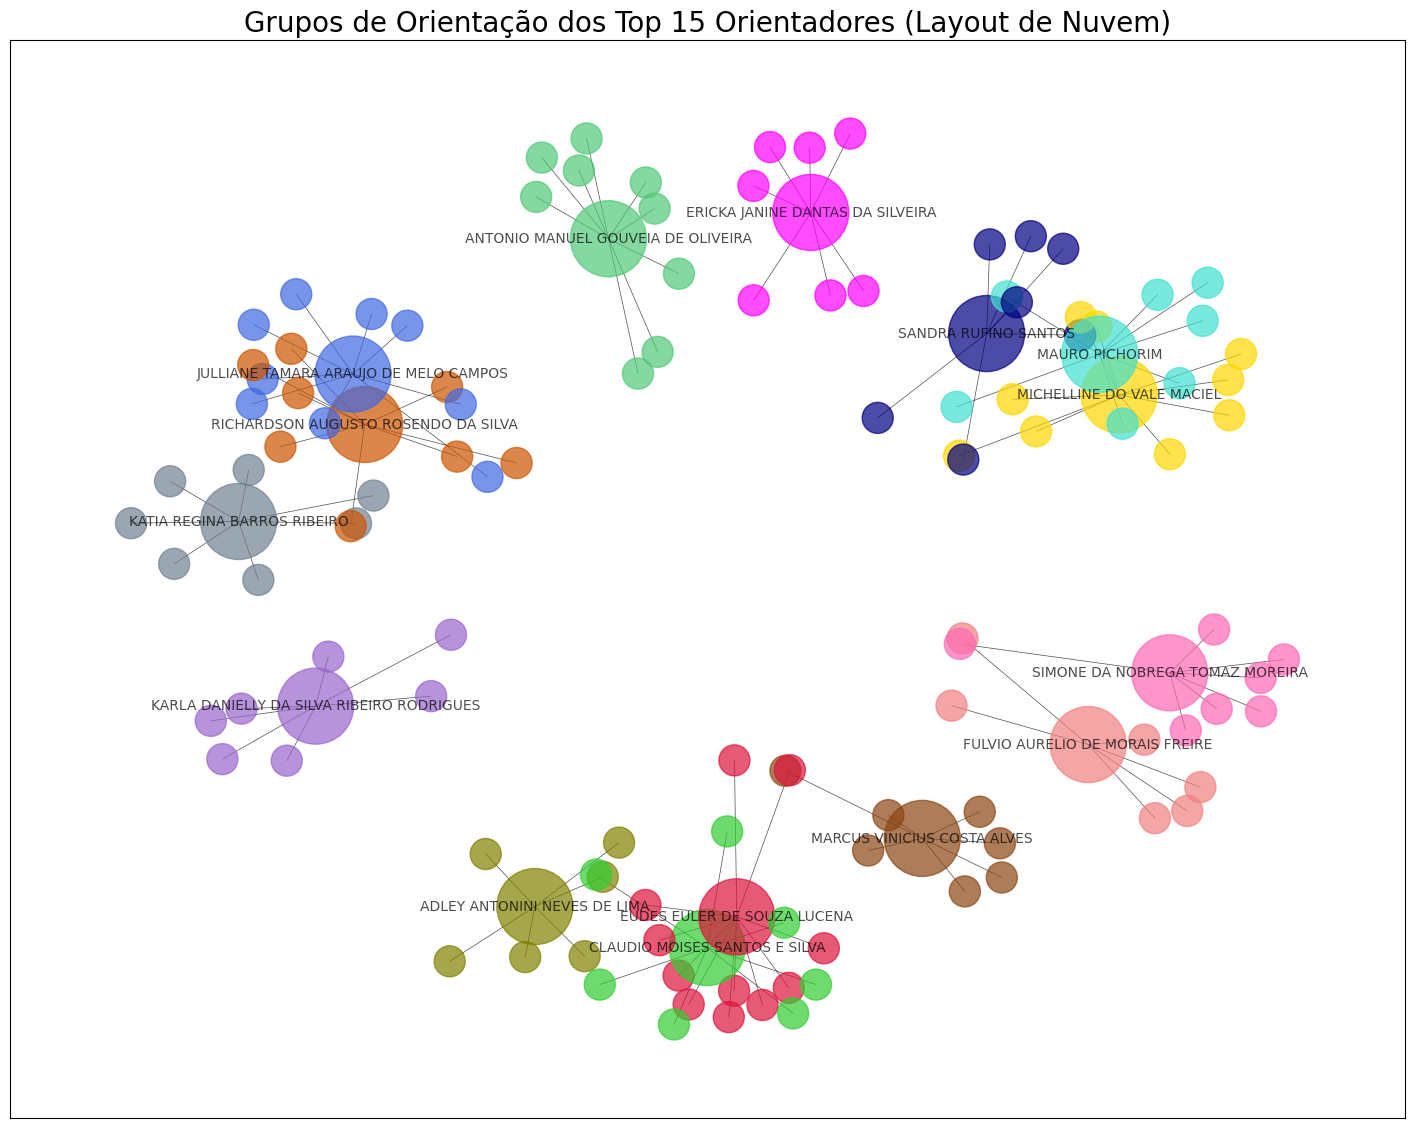

In [ ]:
# --- CRIAR O SUBGRAFO ---

cores_hex = [
    '#DC143C', '#4169E1', '#50C878', '#FFD700', '#CC5500',
    '#9966CC', '#FF69B4', '#40E0D0', '#32CD32', '#000080',
    '#FF00FF', '#8B4513', '#708090', '#F08080', '#808000'
]

nos_para_subgrafo = set(top_orientadores)
for orientador in top_orientadores:
    alunos_deste_orientador = G.neighbors(orientador)
    nos_para_subgrafo.update(alunos_deste_orientador)
subgrafo_top_N = G.subgraph(nos_para_subgrafo)

mapa_de_cores = {orientador: cores_hex[i % len(cores_hex)] 
                 for i, orientador in enumerate(top_orientadores)}

num_orientadores = len(top_orientadores)

# Itere sobre os nós para definir TODOS os atributos de uma vez
for node in subgrafo_top_N.nodes():
    if node in top_orientadores:
        subgrafo_top_N.nodes[node]['tipo'] = 'Orientador'
        subgrafo_top_N.nodes[node]['size'] = 3000
        subgrafo_top_N.nodes[node]['color'] = mapa_de_cores[node]

    else:
        professor = list(subgrafo_top_N.neighbors(node))[0]
        subgrafo_top_N.nodes[node]['tipo'] = 'Bolsista'
        subgrafo_top_N.nodes[node]['size'] = 500
        subgrafo_top_N.nodes[node]['color'] = mapa_de_cores[professor]   


# --- SALVAR O ARQUIVO GEXF ---
print("Salvando grafo enriquecido para o Gephi...")
nx.write_gexf(subgrafo_top_N, '1_gephi.gexf')
print("Arquivo salvo!")


# --- VISUALIZAR NO MATPLOTLIB ---

# Pegue os atributos que acabamos de salvar no grafo para a visualização
node_colors = [subgrafo_top_N.nodes[n]['color'] for n in subgrafo_top_N.nodes()]
node_sizes = [subgrafo_top_N.nodes[n]['size'] for n in subgrafo_top_N.nodes()]
labels_para_mostrar = {n: n for n in subgrafo_top_N.nodes() if subgrafo_top_N.nodes[n]['tipo'] == 'Orientador'}

# Desenhando o grafo
plt.figure(figsize=(18, 14))

posicoes = nx.spring_layout(subgrafo_top_N, iterations=100, k=0.4) 

nx.draw_networkx(
    subgrafo_top_N,
    pos=posicoes,
    labels=labels_para_mostrar,
    with_labels=True,
    node_size=node_sizes,
    node_color=node_colors,
    width=0.5,
    alpha=0.7,
    font_size=10
)

plt.title(f'Grupos de Orientação dos Top {N} Orientadores (Layout de Nuvem)', size=20)
plt.show()